In [389]:
#pip install --upgrade scikit-learn

# Importing libraries

In [444]:
import pandas as pd
from category_encoders import *
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
from datetime import datetime
from math import floor

import seaborn as sns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler ()
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import metrics

# Data features
from numpy import set_printoptions
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest, chi2

import warnings
warnings.filterwarnings('ignore')

## Importing Data from excel

In [391]:
Data=pd.read_excel("Raw_data.xlsx", sheet_name=None)

### Importing transactions sheet

In [392]:
Transactions=Data["Transactions"]

In [393]:
t_copy=Transactions.copy()

# EDA(Exploratory Data Analysis)

In [394]:
t_copy.head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [395]:
#checking characteristics of data
t_copy.shape

(20000, 13)

In [396]:
#Checking datatypes of columns
t_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

### Checking characteristics of data

In [397]:
t_copy.describe()

,transaction_id,product_id,customer_id,transaction_date,online_order,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,20000,19640.000000,20000.000000,19803.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,2017-07-01 14:08:05.280000,0.500458,1107.829449,556.046951,38199.776549
min,1.000000,0.00000,1.000000,2017-01-01 00:00:00,0.000000,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,2017-04-01 00:00:00,0.000000,575.270000,215.140000,35667.000000
50%,10000.500000,44.00000,1736.000000,2017-07-03 00:00:00,1.000000,1163.890000,507.580000,38216.000000
75%,15000.250000,72.00000,2613.000000,2017-10-02 00:00:00,1.000000,1635.300000,795.100000,40672.000000
max,20000.000000,100.00000,5034.000000,2017-12-30 00:00:00,1.000000,2091.470000,1759.850000,42710.000000
std,5773.647028,30.75359,1011.951046,NaN,0.500013,582.825242,405.955660,2875.201110


In [398]:
t_copy.describe(include='object')

,order_status,brand,product_line,product_class,product_size
count,20000,19803,19803,19803,19803
unique,2,6,4,3,3
top,Approved,Solex,Standard,medium,medium
freq,19821,4253,14176,13826,12990


### Checking  for missing (null) values

In [399]:
t_copy.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

### Checking for duplicates

In [400]:
t_copy.duplicated().sum()

0

## Data preprocessing

In [401]:
#Converting product_first_sold_date to datetime column
t_copy['product_first_sold_date'] = pd.to_datetime(t_copy['product_first_sold_date'], unit='s')

In [402]:
t_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

### Replacing missing values

#### online_order

In [403]:
t_copy['online_order'].value_counts()

online_order
1.0    9829
0.0    9811
Name: count, dtype: int64

In [404]:
t_copy['online_order'].fillna(t_copy['online_order'].mode()[0],inplace=True)

In [405]:
t_copy.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order                 0
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

#### brand

In [406]:
t_copy['brand'].value_counts()

brand
Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: count, dtype: int64

In [407]:
t_copy['brand'].fillna(method = "ffill",inplace=True)

In [408]:
t_copy.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order                 0
order_status                 0
brand                        0
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

#### product_line

In [409]:
t_copy['product_line'].value_counts()

product_line
Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: count, dtype: int64

In [410]:
t_copy['product_line'].fillna(method="ffill",inplace=True)

In [411]:
t_copy.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order                 0
order_status                 0
brand                        0
product_line                 0
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

#### product_class

In [412]:
t_copy['product_class'].value_counts()

product_class
medium    13826
high       3013
low        2964
Name: count, dtype: int64

In [413]:
t_copy['product_class'].fillna(method="ffill",inplace=True)

In [414]:
t_copy.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order                 0
order_status                 0
brand                        0
product_line                 0
product_class                0
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

#### product_size

In [415]:
t_copy['product_size'].value_counts()

product_size
medium    12990
large      3976
small      2837
Name: count, dtype: int64

In [416]:
t_copy['product_size'].fillna(method="ffill",inplace=True)

In [417]:
t_copy['product_size'].value_counts()

product_size
medium    13115
large      4022
small      2863
Name: count, dtype: int64

In [418]:
t_copy.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order                 0
order_status                 0
brand                        0
product_line                 0
product_class                0
product_size                 0
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

#### standard_cost

In [419]:
t_copy['standard_cost'].fillna(t_copy['standard_cost'].mean(),inplace=True)

In [420]:
t_copy.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order                 0
order_status                 0
brand                        0
product_line                 0
product_class                0
product_size                 0
list_price                   0
standard_cost                0
product_first_sold_date    197
dtype: int64

In [421]:
cost=pd.DataFrame(t_copy.groupby('customer_id')['list_price'].mean())

In [422]:
cost.head()

,list_price
customer_id,
1,825.859091
2,1383.023333
3,1236.028750
4,523.860000
5,983.866667


In [423]:
#Drop column product_first_sold_date
t_copy.drop(columns='product_first_sold_date',inplace=True)

### Data Visualization

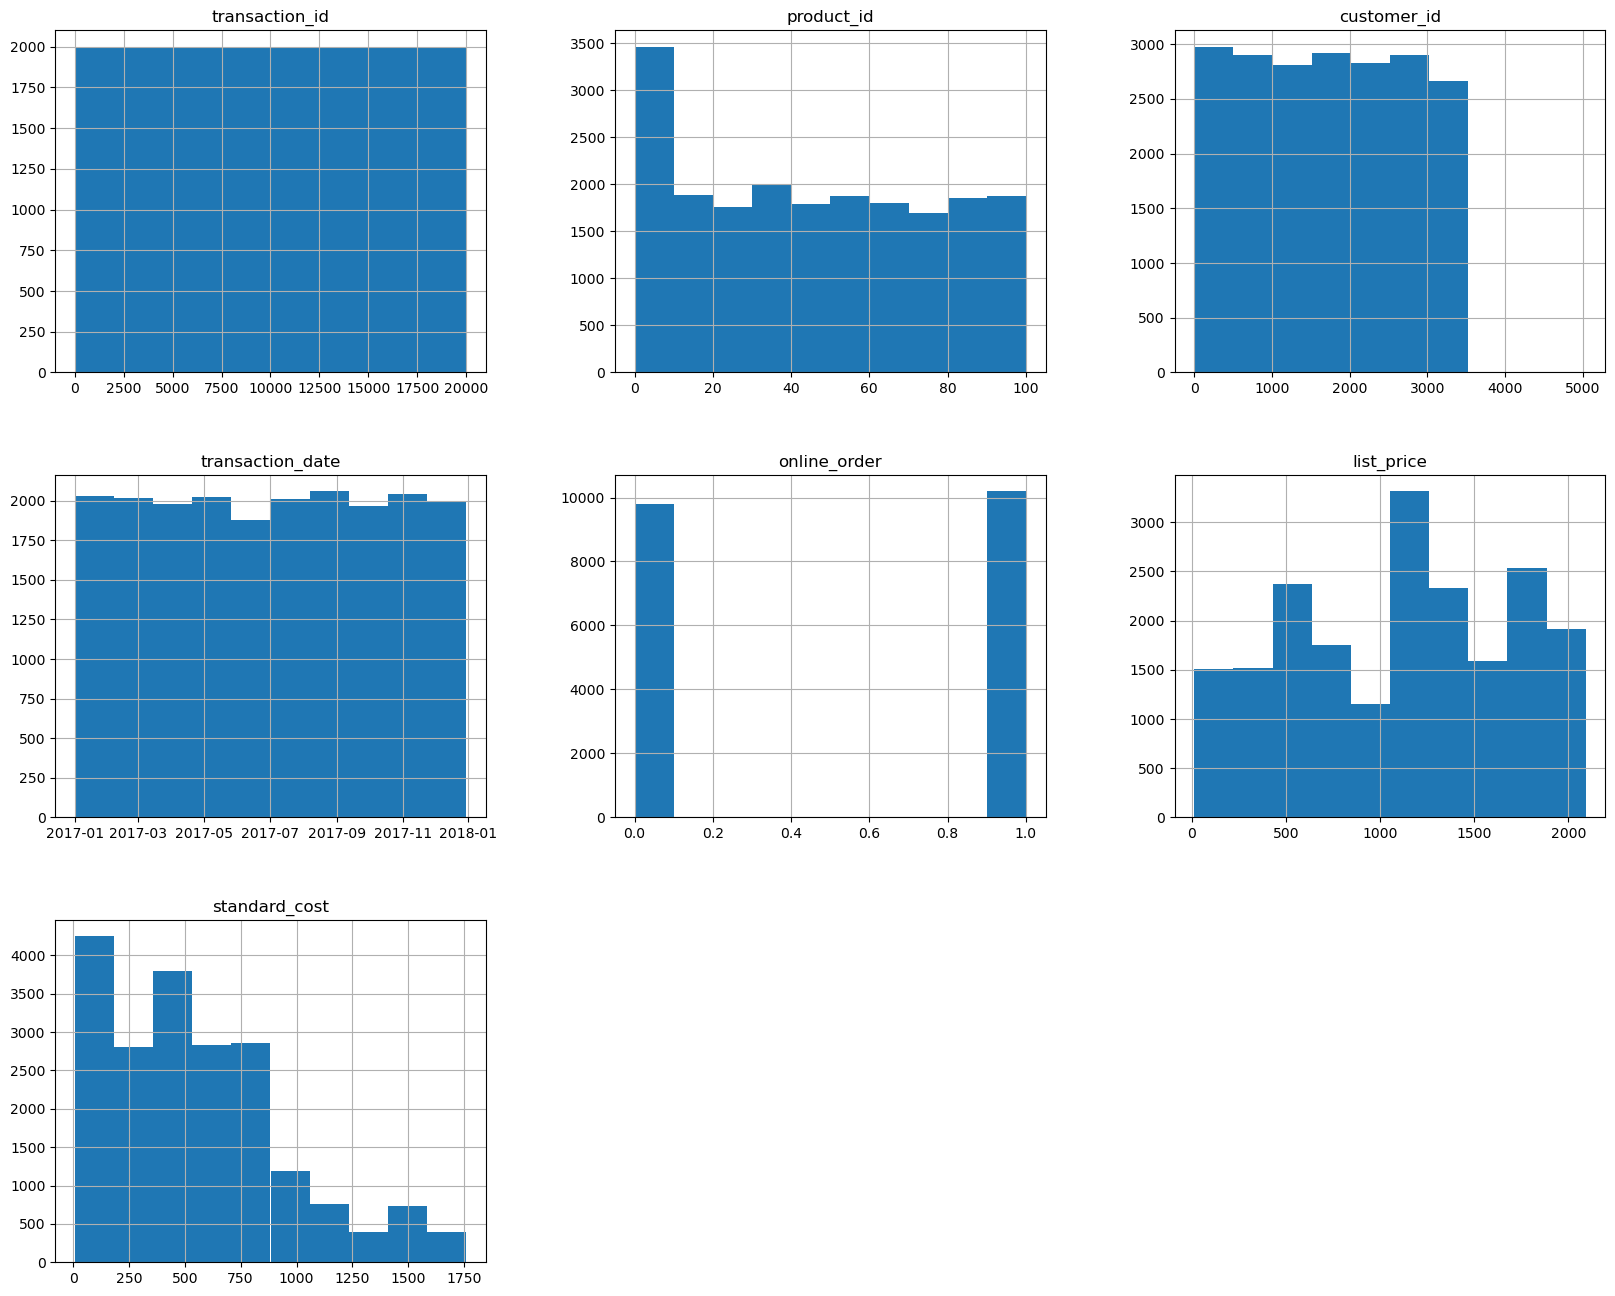

In [424]:
# showing the histogram of Clean dataframe
t_copy.hist(figsize=(20,16))
plt.show()

### Feature Engineering

In [425]:
#Making a new column Profit
t_copy["Profit"]=t_copy["list_price"]-t_copy["standard_cost"]
t_copy.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,Profit
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,17.87
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1702.55
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1544.61
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,817.36
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1055.82


### Creating dataframes for customer behaviour (aggregates of each column group by customer_id)

In [426]:
#Customer profit
customer_profit=t_copy.groupby("customer_id")["Profit"].mean()
customer_profit.head()
customer_profit.reset_index()

,customer_id,Profit
0,1,274.371818
1,2,742.086667
2,3,420.351250
3,4,110.285000
4,5,399.156667
...,...,...
3489,3497,549.440000
3490,3498,524.555000
3491,3499,707.892857
3492,3500,297.643333


In [427]:
customer_total=pd.DataFrame(t_copy.groupby('customer_id')['Profit'].sum())

In [428]:
customer_Total=pd.DataFrame(t_copy.groupby('customer_id')['list_price'].sum())

In [429]:
customer_Total.head()

,list_price
customer_id,
1,9084.45
2,4149.07
3,9888.23
4,1047.72
5,5903.20


In [430]:
#Dataframe for profits
customer_profit=pd.DataFrame(customer_profit)

In [431]:
customer_profit.shape

(3494, 1)

In [432]:
#Customer average (average money spent by each customer)
customer_average = t_copy.groupby("customer_id")["list_price"].mean()
customer_avg=customer_average.reset_index()
customer_avg.head()

,customer_id,list_price
0,1,825.859091
1,2,1383.023333
2,3,1236.028750
3,4,523.860000
4,5,983.866667


In [433]:
#Dataframe for average money spent by each customer
customer_avg=pd.DataFrame(customer_avg)

In [434]:
customer_avg.shape

(3494, 2)

In [435]:
#customer_brand
customer_brand=t_copy.groupby("customer_id")["brand"].agg(lambda x:x.mode()[0])
customer_brand.head()

customer_id
1    Giant Bicycles
2          WeareA2B
3    Norco Bicycles
4    Giant Bicycles
5    Norco Bicycles
Name: brand, dtype: object

In [436]:
#dataframe for most frequent brand
customer_brand=pd.DataFrame(customer_brand)

In [437]:
#Customer product line
customer_product_line=t_copy.groupby("customer_id")["product_line"].agg(lambda x:x.mode()[0])
customer_product_line.head()

customer_id
1    Standard
2    Standard
3    Standard
4    Standard
5        Road
Name: product_line, dtype: object

In [438]:
#dataframe for most frequent product line
customer_product_line=pd.DataFrame(customer_product_line)

In [439]:
#Customer product_size
customer_product_size=t_copy.groupby("customer_id")["product_size"].apply(lambda x:x.value_counts().index[0])
customer_product_size.head()

customer_id
1    medium
2    medium
3     large
4     large
5     large
Name: product_size, dtype: object

In [440]:
#dataframe for product_size
customer_product_size=pd.DataFrame(customer_product_size)

In [441]:
#Customer product_class
customer_product_class=t_copy.groupby("customer_id")["product_class"].apply(lambda x:x.value_counts().index[0])
customer_product_class.head()

customer_id
1    medium
2    medium
3    medium
4    medium
5    medium
Name: product_class, dtype: object

In [442]:
#dataframe for most frequent product_class
customer_product_class=pd.DataFrame(customer_product_class)

In [443]:
#Total number of times customer purchased
customer_purchasecount=t_copy.groupby("customer_id")["transaction_id"].count()
customer_purchasecount.head()

customer_id
1    11
2     3
3     8
4     2
5     6
Name: transaction_id, dtype: int64

In [379]:
#dataframe for total times customer purchased
customer_purchasecount=pd.DataFrame(customer_purchasecount)

### Feature engineering -Creating a column RFM (recency frequency monetary): Greatest purchase date - greatest purchase date of each customer



In [458]:
max_date=t_copy['transaction_date'].max()

In [466]:
max_date

Timestamp('2017-12-30 00:00:00')

In [459]:
recent_date=t_copy.groupby('customer_id')['transaction_date'].max()

In [462]:
recent_date.head()

customer_id
1   2017-12-23
2   2017-08-24
3   2017-09-19
4   2017-06-18
5   2017-12-14
Name: transaction_date, dtype: datetime64[ns]

In [463]:
recent_date=pd.DataFrame(recent_date)

In [465]:
recent_date.head()

,transaction_date
customer_id,
1,2017-12-23
2,2017-08-24
3,2017-09-19
4,2017-06-18
5,2017-12-14


In [472]:
recency = max_date - recent_date

In [474]:
recency.head()

,transaction_date
customer_id,
1,7 days
2,128 days
3,102 days
4,195 days
5,16 days


In [475]:
recency=pd.DataFrame(recency)

In [476]:
recency.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3494 entries, 1 to 5034
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   transaction_date  3494 non-null   timedelta64[ns]
dtypes: timedelta64[ns](1)
memory usage: 54.6 KB


### Creating a dataset with all customer behaviour merged

In [477]:
#merging all dataframes into one dataframe customer_behaviour
Customer_behaviour=pd.merge(customer_avg,customer_purchasecount, on ='customer_id')

In [478]:
Customer_behaviour=pd.merge(Customer_behaviour,customer_profit,on='customer_id')

In [479]:
Customer_behaviour=pd.merge(Customer_behaviour,customer_product_line,on='customer_id')

In [480]:
Customer_behaviour=pd.merge(Customer_behaviour,customer_product_size,on='customer_id')

In [481]:
Customer_behaviour=pd.merge(Customer_behaviour,customer_product_class,on='customer_id')

In [482]:
Customer_behaviour=pd.merge(Customer_behaviour,customer_brand,on='customer_id')

In [483]:
print(Customer_behaviour.columns)
print(recency.columns)

Index(['customer_id', 'list_price', 'transaction_id', 'Profit', 'product_line',
       'product_size', 'product_class', 'brand'],
      dtype='object')
Index(['transaction_date'], dtype='object')


In [484]:
Customer_behaviour = pd.merge(Customer_behaviour, recency, on='customer_id')

In [486]:
Customer_behaviour.head()

,customer_id,list_price,transaction_id,Profit,product_line,product_size,product_class,brand,transaction_date
0,1,825.859091,11,274.371818,Standard,medium,medium,Giant Bicycles,7 days
1,2,1383.023333,3,742.086667,Standard,medium,medium,WeareA2B,128 days
2,3,1236.028750,8,420.351250,Standard,large,medium,Norco Bicycles,102 days
3,4,523.860000,2,110.285000,Standard,large,medium,Giant Bicycles,195 days
4,5,983.866667,6,399.156667,Road,large,medium,Norco Bicycles,16 days


In [487]:
#Rename the columns
Customer_behaviour=Customer_behaviour.rename(columns={'list_price':'avg_revenue','transaction_id':'num_of_purchase','Profit':'avg_profit','transaction_date':'recency'})

In [488]:
Customer_behaviour.head()

,customer_id,avg_revenue,num_of_purchase,avg_profit,product_line,product_size,product_class,brand,recency
0,1,825.859091,11,274.371818,Standard,medium,medium,Giant Bicycles,7 days
1,2,1383.023333,3,742.086667,Standard,medium,medium,WeareA2B,128 days
2,3,1236.028750,8,420.351250,Standard,large,medium,Norco Bicycles,102 days
3,4,523.860000,2,110.285000,Standard,large,medium,Giant Bicycles,195 days
4,5,983.866667,6,399.156667,Road,large,medium,Norco Bicycles,16 days


In [489]:
Customer_behaviour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3494 entries, 0 to 3493
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   customer_id      3494 non-null   int64          
 1   avg_revenue      3494 non-null   float64        
 2   num_of_purchase  3494 non-null   int64          
 3   avg_profit       3494 non-null   float64        
 4   product_line     3494 non-null   object         
 5   product_size     3494 non-null   object         
 6   product_class    3494 non-null   object         
 7   brand            3494 non-null   object         
 8   recency          3494 non-null   timedelta64[ns]
dtypes: float64(2), int64(2), object(4), timedelta64[ns](1)
memory usage: 245.8+ KB


# Importing Newcustomerlist sheet

In [490]:
NewCustomerList=Data["NewCustomerList"]

In [491]:
New=NewCustomerList.copy()

In [492]:
New.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.72,0.900,1.1250,0.956250,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.53,0.530,0.6625,0.563125,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.91,0.910,0.9100,0.910000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.86,1.075,1.0750,1.075000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.88,0.880,1.1000,1.100000,4,4,1.703125


In [493]:
New.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           1000 non-null   object 
 1   last_name                            971 non-null    object 
 2   gender                               1000 non-null   object 
 3   past_3_years_bike_related_purchases  1000 non-null   int64  
 4   DOB                                  983 non-null    object 
 5   job_title                            894 non-null    object 
 6   job_industry_category                835 non-null    object 
 7   wealth_segment                       1000 non-null   object 
 8   deceased_indicator                   1000 non-null   object 
 9   owns_car                             1000 non-null   object 
 10  tenure                               1000 non-null   int64  
 11  address                        

In [494]:
#dropping unneccary columns
New.drop(columns=['Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20'],axis=1,inplace=True)

# Importing Customer demographic sheet

In [495]:
Customer_demographic=Data['CustomerDemographic']

In [496]:
demographic=Customer_demographic.copy()

In [497]:
demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [498]:
demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  default                              3698 non-null   object 
 11  owns_car                      

# Importing customer address sheet

In [499]:
customer_address=Data['CustomerAddress']

In [500]:
address=customer_address.copy()

In [501]:
address.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


## Merging customer demographic with customer address

In [502]:
#add columns from address to demographic using customer id as key
customer_demo=demographic.merge(address, on='customer_id', how='left')

In [503]:
customer_demo.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,6 Meadow Vale Court,2153.0,New South Wales,Australia,10.0
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0,NaN,NaN,NaN,NaN,NaN
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0,0 Holy Cross Court,4211.0,QLD,Australia,9.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0,17979 Del Mar Point,2448.0,New South Wales,Australia,4.0


In [504]:
#dropping unnecessary columns
customer_demo=customer_demo.drop(columns=['default','address','country'])

In [505]:
customer_demo['customer_id'].max()

4000

### Adding customer id column to newcustomer list starting from 4001

In [506]:
New['customer_id']=range(4001,4001 + len (New))

In [507]:
New.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,customer_id
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,4001
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,4002
2,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,4003
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,4004
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,4005


In [508]:
#making a copy of New customer list to drop columns, we neeed to access the rankings later on.
New_copy=New.copy()

In [509]:
New_copy=New_copy.drop(columns=['Rank','Value'])

In [510]:
#dropping more unnecessary columns
New_copy=New_copy.drop(columns=['address','country'])

In [511]:
New_copy.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,postcode,state,property_valuation,customer_id
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,4500,QLD,6,4001
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,2113,NSW,11,4002
2,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,3505,VIC,5,4003
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,4814,QLD,1,4004
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,2093,NSW,9,4005


In [512]:
customer_demo.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,postcode,state,property_valuation
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,Yes,11.0,2016.0,New South Wales,10.0
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,2153.0,New South Wales,10.0
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,NaN,NaN,NaN
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,No,7.0,4211.0,QLD,9.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,2448.0,New South Wales,4.0


## Appending Newcustomerlist to Customer demograhic 

In [513]:
#Rearranging the columns of New customer list to match with customer demographic in preparation for appending
New_copy=New_copy.reindex(columns=customer_demo.columns)

In [514]:
New_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   customer_id                          1000 non-null   int64 
 1   first_name                           1000 non-null   object
 2   last_name                            971 non-null    object
 3   gender                               1000 non-null   object
 4   past_3_years_bike_related_purchases  1000 non-null   int64 
 5   DOB                                  983 non-null    object
 6   job_title                            894 non-null    object
 7   job_industry_category                835 non-null    object
 8   wealth_segment                       1000 non-null   object
 9   deceased_indicator                   1000 non-null   object
 10  owns_car                             1000 non-null   object
 11  tenure                               1000 no

In [515]:
customer_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  owns_car                             4000 non-null   object 
 11  tenure                        

In [516]:
#Appending  both tables with customer id as primary key
customer_demo=pd.concat([customer_demo,New_copy],ignore_index=True)

In [517]:
customer_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          5000 non-null   int64  
 1   first_name                           5000 non-null   object 
 2   last_name                            4846 non-null   object 
 3   gender                               5000 non-null   object 
 4   past_3_years_bike_related_purchases  5000 non-null   int64  
 5   DOB                                  4896 non-null   object 
 6   job_title                            4388 non-null   object 
 7   job_industry_category                4179 non-null   object 
 8   wealth_segment                       5000 non-null   object 
 9   deceased_indicator                   5000 non-null   object 
 10  owns_car                             5000 non-null   object 
 11  tenure                        

In [518]:
#To check for any duplicated customer from new customer list
duplicated_customer=customer_demo[customer_demo.duplicated(subset=['first_name','last_name','gender','past_3_years_bike_related_purchases','DOB','job_title','job_industry_category','wealth_segment','deceased_indicator','owns_car','tenure','postcode','state','property_valuation'])]

In [519]:
duplicated_customer.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,postcode,state,property_valuation


In [520]:
customer_demo.isnull().any()

customer_id                            False
first_name                             False
last_name                               True
gender                                 False
past_3_years_bike_related_purchases    False
DOB                                     True
job_title                               True
job_industry_category                   True
wealth_segment                         False
deceased_indicator                     False
owns_car                               False
tenure                                  True
postcode                                True
state                                   True
property_valuation                      True
dtype: bool

In [521]:
customer_demo.isnull().sum()

customer_id                              0
first_name                               0
last_name                              154
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                    104
job_title                              612
job_industry_category                  821
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
postcode                                 4
state                                    4
property_valuation                       4
dtype: int64

## Merging Customer behaviour with customer demographic

In [522]:
customer_fulldetails=pd.merge(Customer_behaviour,customer_demo,on='customer_id',how='inner')

In [523]:
customer_fulldetails.head()

,customer_id,avg_revenue,num_of_purchase,avg_profit,product_line,product_size,product_class,brand,recency,first_name,...,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,postcode,state,property_valuation
0,1,825.859091,11,274.371818,Standard,medium,medium,Giant Bicycles,7 days,Laraine,...,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,Yes,11.0,2016.0,New South Wales,10.0
1,2,1383.023333,3,742.086667,Standard,medium,medium,WeareA2B,128 days,Eli,...,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,2153.0,New South Wales,10.0
2,3,1236.028750,8,420.351250,Standard,large,medium,Norco Bicycles,102 days,Arlin,...,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,NaN,NaN,NaN
3,4,523.860000,2,110.285000,Standard,large,medium,Giant Bicycles,195 days,Talbot,...,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,No,7.0,4211.0,QLD,9.0
4,5,983.866667,6,399.156667,Road,large,medium,Norco Bicycles,16 days,Sheila-kathryn,...,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,2448.0,New South Wales,4.0


In [524]:
customer_fulldetails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype          
---  ------                               --------------  -----          
 0   customer_id                          3493 non-null   int64          
 1   avg_revenue                          3493 non-null   float64        
 2   num_of_purchase                      3493 non-null   int64          
 3   avg_profit                           3493 non-null   float64        
 4   product_line                         3493 non-null   object         
 5   product_size                         3493 non-null   object         
 6   product_class                        3493 non-null   object         
 7   brand                                3493 non-null   object         
 8   recency                              3493 non-null   timedelta64[ns]
 9   first_name                           3493 non-null   object         
 10  

In [525]:
#Changing datatype of DOB to datetime
customer_fulldetails['DOB']=pd.to_datetime(customer_fulldetails['DOB'])

In [526]:
customer_fulldetails.drop(columns=['first_name','last_name','past_3_years_bike_related_purchases','job_title','owns_car',],inplace=True)

In [527]:
#Making new column Age from DOB
customer_fulldetails['Age']=round((datetime.now()-customer_fulldetails['DOB'])//pd.Timedelta(days=365.25))

In [528]:
customer_fulldetails.head()

,customer_id,avg_revenue,num_of_purchase,avg_profit,product_line,product_size,product_class,brand,recency,gender,DOB,job_industry_category,wealth_segment,deceased_indicator,tenure,postcode,state,property_valuation,Age
0,1,825.859091,11,274.371818,Standard,medium,medium,Giant Bicycles,7 days,F,1953-10-12,Health,Mass Customer,N,11.0,2016.0,New South Wales,10.0,70.0
1,2,1383.023333,3,742.086667,Standard,medium,medium,WeareA2B,128 days,Male,1980-12-16,Financial Services,Mass Customer,N,16.0,2153.0,New South Wales,10.0,43.0
2,3,1236.028750,8,420.351250,Standard,large,medium,Norco Bicycles,102 days,Male,1954-01-20,Property,Mass Customer,N,15.0,NaN,NaN,NaN,70.0
3,4,523.860000,2,110.285000,Standard,large,medium,Giant Bicycles,195 days,Male,1961-10-03,IT,Mass Customer,N,7.0,4211.0,QLD,9.0,62.0
4,5,983.866667,6,399.156667,Road,large,medium,Norco Bicycles,16 days,Female,1977-05-13,NaN,Affluent Customer,N,8.0,2448.0,New South Wales,4.0,47.0


In [529]:
customer_fulldetails.drop(columns='DOB',inplace=True)

### Replacing missing values

In [530]:
customer_fulldetails.isnull().sum()

customer_id                0
avg_revenue                0
num_of_purchase            0
avg_profit                 0
product_line               0
product_size               0
product_class              0
brand                      0
recency                    0
gender                     0
job_industry_category    561
wealth_segment             0
deceased_indicator         0
tenure                    76
postcode                   4
state                      4
property_valuation         4
Age                       76
dtype: int64

In [531]:
#replacing mssing values in job_industry_category
customer_fulldetails['job_industry_category'].value_counts()

job_industry_category
Manufacturing         703
Financial Services    687
Health                532
Retail                304
Property              231
IT                    189
Entertainment         123
Argiculture           100
Telecommunications     63
Name: count, dtype: int64

In [532]:
#Given the distribution of categories, replace method would be forward fill
customer_fulldetails['job_industry_category'].fillna(method="ffill",inplace=True)

In [533]:
#replaing mising values in tenure
customer_fulldetails['tenure'].fillna(customer_fulldetails['tenure'].mode()[0],inplace=True)

In [534]:
#replacing missing values in postcode
customer_fulldetails['postcode'].fillna(customer_fulldetails['postcode'].mode()[0],inplace=True)

In [535]:
#replacing missing values in state
customer_fulldetails['state'].fillna(customer_fulldetails['state'].mode()[0],inplace=True)

In [536]:
#replacing missing values in property valuation
customer_fulldetails['property_valuation'].unique()

array([10., nan,  9.,  4., 12.,  8.,  6.,  7.,  3.,  5., 11.,  1.,  2.])

In [537]:
#given there are 12 unique values, missing values would be replaced with most frequent
customer_fulldetails['property_valuation'].fillna(customer_fulldetails['property_valuation'].mode()[0],inplace=True)

In [538]:
#Replacing missing value in Age with forward fill
customer_fulldetails['Age'].fillna(method="ffill",inplace=True)


### Feauture engineering

In [539]:
#making new column agerange
# Define function to categorize age into groups
def categorize_age(age):
    if age <=26:
        return 'Young Adult'
    elif age <=45:
        return 'Adult'
    elif age <=60:
        return 'Senior Adult'
    else:
        return 'Old'
    
# Apply the function to create a new 'Age Group' column
customer_fulldetails['Age Group'] = customer_fulldetails['Age'].apply(categorize_age)

In [540]:
customer_fulldetails.isnull().sum()

customer_id              0
avg_revenue              0
num_of_purchase          0
avg_profit               0
product_line             0
product_size             0
product_class            0
brand                    0
recency                  0
gender                   0
job_industry_category    0
wealth_segment           0
deceased_indicator       0
tenure                   0
postcode                 0
state                    0
property_valuation       0
Age                      0
Age Group                0
dtype: int64

### Standardizing values in columns

In [541]:
#Standardizing gender column
customer_fulldetails['gender'].unique()

array(['F', 'Male', 'Female', 'U', 'Femal', 'M'], dtype=object)

In [542]:
customer_fulldetails['gender'].replace(['F','Femal'],'Female',inplace=True)
customer_fulldetails['gender'].replace('M','Male',inplace=True)
customer_fulldetails['gender'].replace('U','Others',inplace=True)

In [543]:
customer_fulldetails['gender'].unique()

array(['Female', 'Male', 'Others'], dtype=object)

In [544]:
#Standardizing state column
customer_fulldetails['state'].unique()

array(['New South Wales', 'NSW', 'QLD', 'VIC', 'Victoria'], dtype=object)

In [545]:
customer_fulldetails['state'].replace('New South Wales','NSW',inplace=True)
customer_fulldetails['state'].replace('Victoria','VIC',inplace=True)

In [546]:
customer_fulldetails['state'].unique()

array(['NSW', 'QLD', 'VIC'], dtype=object)

In [547]:
customer_fulldetails['wealth_segment'].unique()

array(['Mass Customer', 'Affluent Customer', 'High Net Worth'],
      dtype=object)

In [548]:
customer_fulldetails['deceased_indicator'].unique()

array(['N', 'Y'], dtype=object)

In [549]:
customer_fulldetails.head()

,customer_id,avg_revenue,num_of_purchase,avg_profit,product_line,product_size,product_class,brand,recency,gender,job_industry_category,wealth_segment,deceased_indicator,tenure,postcode,state,property_valuation,Age,Age Group
0,1,825.859091,11,274.371818,Standard,medium,medium,Giant Bicycles,7 days,Female,Health,Mass Customer,N,11.0,2016.0,NSW,10.0,70.0,Old
1,2,1383.023333,3,742.086667,Standard,medium,medium,WeareA2B,128 days,Male,Financial Services,Mass Customer,N,16.0,2153.0,NSW,10.0,43.0,Adult
2,3,1236.028750,8,420.351250,Standard,large,medium,Norco Bicycles,102 days,Male,Property,Mass Customer,N,15.0,2153.0,NSW,8.0,70.0,Old
3,4,523.860000,2,110.285000,Standard,large,medium,Giant Bicycles,195 days,Male,IT,Mass Customer,N,7.0,4211.0,QLD,9.0,62.0,Old
4,5,983.866667,6,399.156667,Road,large,medium,Norco Bicycles,16 days,Female,IT,Affluent Customer,N,8.0,2448.0,NSW,4.0,47.0,Senior Adult


In [550]:
customer_fulldetails.shape

(3493, 19)

# Creating final dataset for analysis and modelling

In [551]:
#Making a copy with Age column for Data modelling
Customer_fulldetails=customer_fulldetails.copy()

In [552]:
Customer_fulldetails.to_excel('data_planet_project(Age present).xlsx',index=False)

In [553]:
#making copy with transaction date for data analysis
Customer_details=Customer_fulldetails.merge(recent_date, on='customer_id', how='left')

In [555]:
Customer_detailss=Customer_details.merge(customer_total, on='customer_id', how='left')

In [556]:
customer_Total.head()

,list_price
customer_id,
1,9084.45
2,4149.07
3,9888.23
4,1047.72
5,5903.20


In [557]:
Customer_detailss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   customer_id            3493 non-null   int64          
 1   avg_revenue            3493 non-null   float64        
 2   num_of_purchase        3493 non-null   int64          
 3   avg_profit             3493 non-null   float64        
 4   product_line           3493 non-null   object         
 5   product_size           3493 non-null   object         
 6   product_class          3493 non-null   object         
 7   brand                  3493 non-null   object         
 8   recency                3493 non-null   timedelta64[ns]
 9   gender                 3493 non-null   object         
 10  job_industry_category  3493 non-null   object         
 11  wealth_segment         3493 non-null   object         
 12  deceased_indicator     3493 non-null   object   

In [558]:
Customer_detailss.rename(columns={'list_price':'Average_spend'},inplace=True)

In [560]:
Customer_detailss=Customer_detailss.merge(cost,on='customer_id',how='left')

In [561]:
Customer_details['Age']=Customer_details['Age'].astype(int)

In [562]:
Customer_detailss.head()

,customer_id,avg_revenue,num_of_purchase,avg_profit,product_line,product_size,product_class,brand,recency,gender,...,tenure,postcode,state,property_valuation,Age,Age Group,transaction_date,Profit,list_price_x,list_price_y
0,1,825.859091,11,274.371818,Standard,medium,medium,Giant Bicycles,7 days,Female,...,11.0,2016.0,NSW,10.0,70.0,Old,2017-12-23,3018.09,825.859091,825.859091
1,2,1383.023333,3,742.086667,Standard,medium,medium,WeareA2B,128 days,Male,...,16.0,2153.0,NSW,10.0,43.0,Adult,2017-08-24,2226.26,1383.023333,1383.023333
2,3,1236.028750,8,420.351250,Standard,large,medium,Norco Bicycles,102 days,Male,...,15.0,2153.0,NSW,8.0,70.0,Old,2017-09-19,3362.81,1236.028750,1236.028750
3,4,523.860000,2,110.285000,Standard,large,medium,Giant Bicycles,195 days,Male,...,7.0,4211.0,QLD,9.0,62.0,Old,2017-06-18,220.57,523.860000,523.860000
4,5,983.866667,6,399.156667,Road,large,medium,Norco Bicycles,16 days,Female,...,8.0,2448.0,NSW,4.0,47.0,Senior Adult,2017-12-14,2394.94,983.866667,983.866667


In [563]:
Customer_detailss.to_excel('data_planet_totals.xlsx',index=False)

In [564]:
Customer_detailss.to_excel('data_planet_averagespend.xlsx',index=False)

# Modelling

In [567]:
planet = pd.read_csv("data_planet_totals.csv")

In [568]:
planet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            3493 non-null   int64  
 1   avg_revenue            3493 non-null   float64
 2   num_of_purchase        3493 non-null   int64  
 3   avg_profit             3493 non-null   float64
 4   product_line           3493 non-null   object 
 5   product_size           3493 non-null   object 
 6   product_class          3493 non-null   object 
 7   brand                  3493 non-null   object 
 8   recency                3493 non-null   int64  
 9   gender                 3493 non-null   object 
 10  job_industry_category  3493 non-null   object 
 11  wealth_segment         3493 non-null   object 
 12  deceased_indicator     3493 non-null   object 
 13  tenure                 3493 non-null   int64  
 14  postcode               3493 non-null   int64  
 15  stat

## Replacing all the non-numeric values in the dataset to numeric equivalents

In [569]:
# Replace non-numeric values with numeric equivalents (Age Group)
planet['Age Group'] = planet['Age Group'].replace({
    'Old': 0,
    'Adult': 1,
    'Senior Adult': 2,
    'Young Adult': 3}).astype(float)

In [570]:
# Replace non-numeric values with numeric equivalents (product_line)
planet['product_line'] = planet['product_line'].replace({
    'Standard': 0,
    'Road': 1,
    'Touring': 2,
    'Mountain': 3}).astype(float)

In [571]:
# Replace non-numeric values with numeric equivalents (product_size)
planet['product_size'] = planet['product_size'].replace({
    'medium': 0,
    'large': 1,
    'small': 2,}).astype(float)

In [572]:
# Replace non-numeric values with numeric equivalents (product_class)
planet['product_class'] = planet['product_class'].replace({
    'medium': 0,
    'high': 1,
    'low': 2,}).astype(float)

In [573]:
# Replace non-numeric values with numeric equivalents (brand)
planet['brand'] = planet['brand'].replace({
    'Giant Bicycles': 0,
    'WeareA2B': 1,
    'Norco Bicycles': 2,
    'Solex': 3,
    'OHM Cycles': 4,
    'Trek Bicycles': 5}).astype(float)

In [574]:
# Replace non-numeric values with numeric equivalents (gender)
planet['gender'] = planet['gender'].replace({
    'Female': 0,
    'Male': 1,
    'Others': 2}).astype(float)

In [575]:
# Replace non-numeric values with numeric equivalents (job_industry_category)
planet['job_industry_category'] = planet['job_industry_category'].replace({
    'Health': 0,
    'Financial Services': 1,
    'Property': 2,
    'IT': 3,
    'Retail': 4,
    'Argiculture': 5, 
    'Manufacturing': 6, 
    'Telecommunications': 7,
    'Entertainment': 8}).astype(float)

In [576]:
# Replace non-numeric values with numeric equivalents (wealth_segment)
planet['wealth_segment'] = planet['wealth_segment'].replace({
    'Mass Customer': 0,
    'Affluent Customer': 1,
    'High Net Worth': 2}).astype(float)

In [577]:
# Replace non-numeric values with numeric equivalents (deceased_indicator)
planet['deceased_indicator'] = planet['deceased_indicator'].replace({
    'N': 0,
    'Y': 1,}).astype(float)

In [578]:
# Replace non-numeric values with numeric equivalents (state)
planet['state'] = planet['state'].replace({
    'NSW': 0,
    'QLD': 1,
    'VIC': 2}).astype(float)

## Charactistics Rechecked

In [579]:
planet.describe()

,customer_id,avg_revenue,num_of_purchase,avg_profit,product_line,product_size,product_class,brand,recency,gender,...,deceased_indicator,tenure,postcode,state,property_valuation,Age,Age Group,Profit,list_price_x,list_price_y
count,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000,...,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000
mean,1749.916118,1107.035264,5.724878,551.098120,0.160034,0.217005,0.171772,2.134269,60.807043,0.518179,...,0.000286,10.602348,2988.379330,0.716576,7.516461,46.324936,1.366733,3159.284418,1107.035264,1107.035264
std,1010.520804,279.805716,2.325749,235.534561,0.437876,0.531782,0.508501,1.666497,57.794061,0.542072,...,0.016920,5.639836,852.180933,0.840929,2.820839,12.802158,0.831306,1778.308601,279.805716,279.805716
min,1.000000,60.340000,1.000000,15.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,2000.000000,0.000000,1.000000,22.000000,0.000000,15.080000,60.340000,60.340000
25%,876.000000,932.490000,4.000000,386.115000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,...,0.000000,6.000000,2200.000000,0.000000,6.000000,37.000000,1.000000,1879.320000,932.490000,932.490000
50%,1750.000000,1105.512500,6.000000,532.267500,0.000000,0.000000,0.000000,2.000000,44.000000,0.000000,...,0.000000,10.000000,2768.000000,0.000000,8.000000,46.000000,1.000000,2892.090000,1105.512500,1105.512500
75%,2624.000000,1284.976250,7.000000,695.552857,0.000000,0.000000,0.000000,3.000000,85.000000,1.000000,...,0.000000,15.000000,3756.000000,2.000000,10.000000,56.000000,2.000000,4241.453049,1284.976250,1284.976250
max,3500.000000,2091.470000,14.000000,1702.550000,3.000000,2.000000,2.000000,5.000000,353.000000,2.000000,...,1.000000,22.000000,4883.000000,2.000000,12.000000,180.000000,3.000000,11668.950000,2091.470000,2091.470000


## Dropping the Age Column

In [580]:
planet.drop(columns = ["Age"], axis = 1, inplace = True)

## Visualization on the dataset

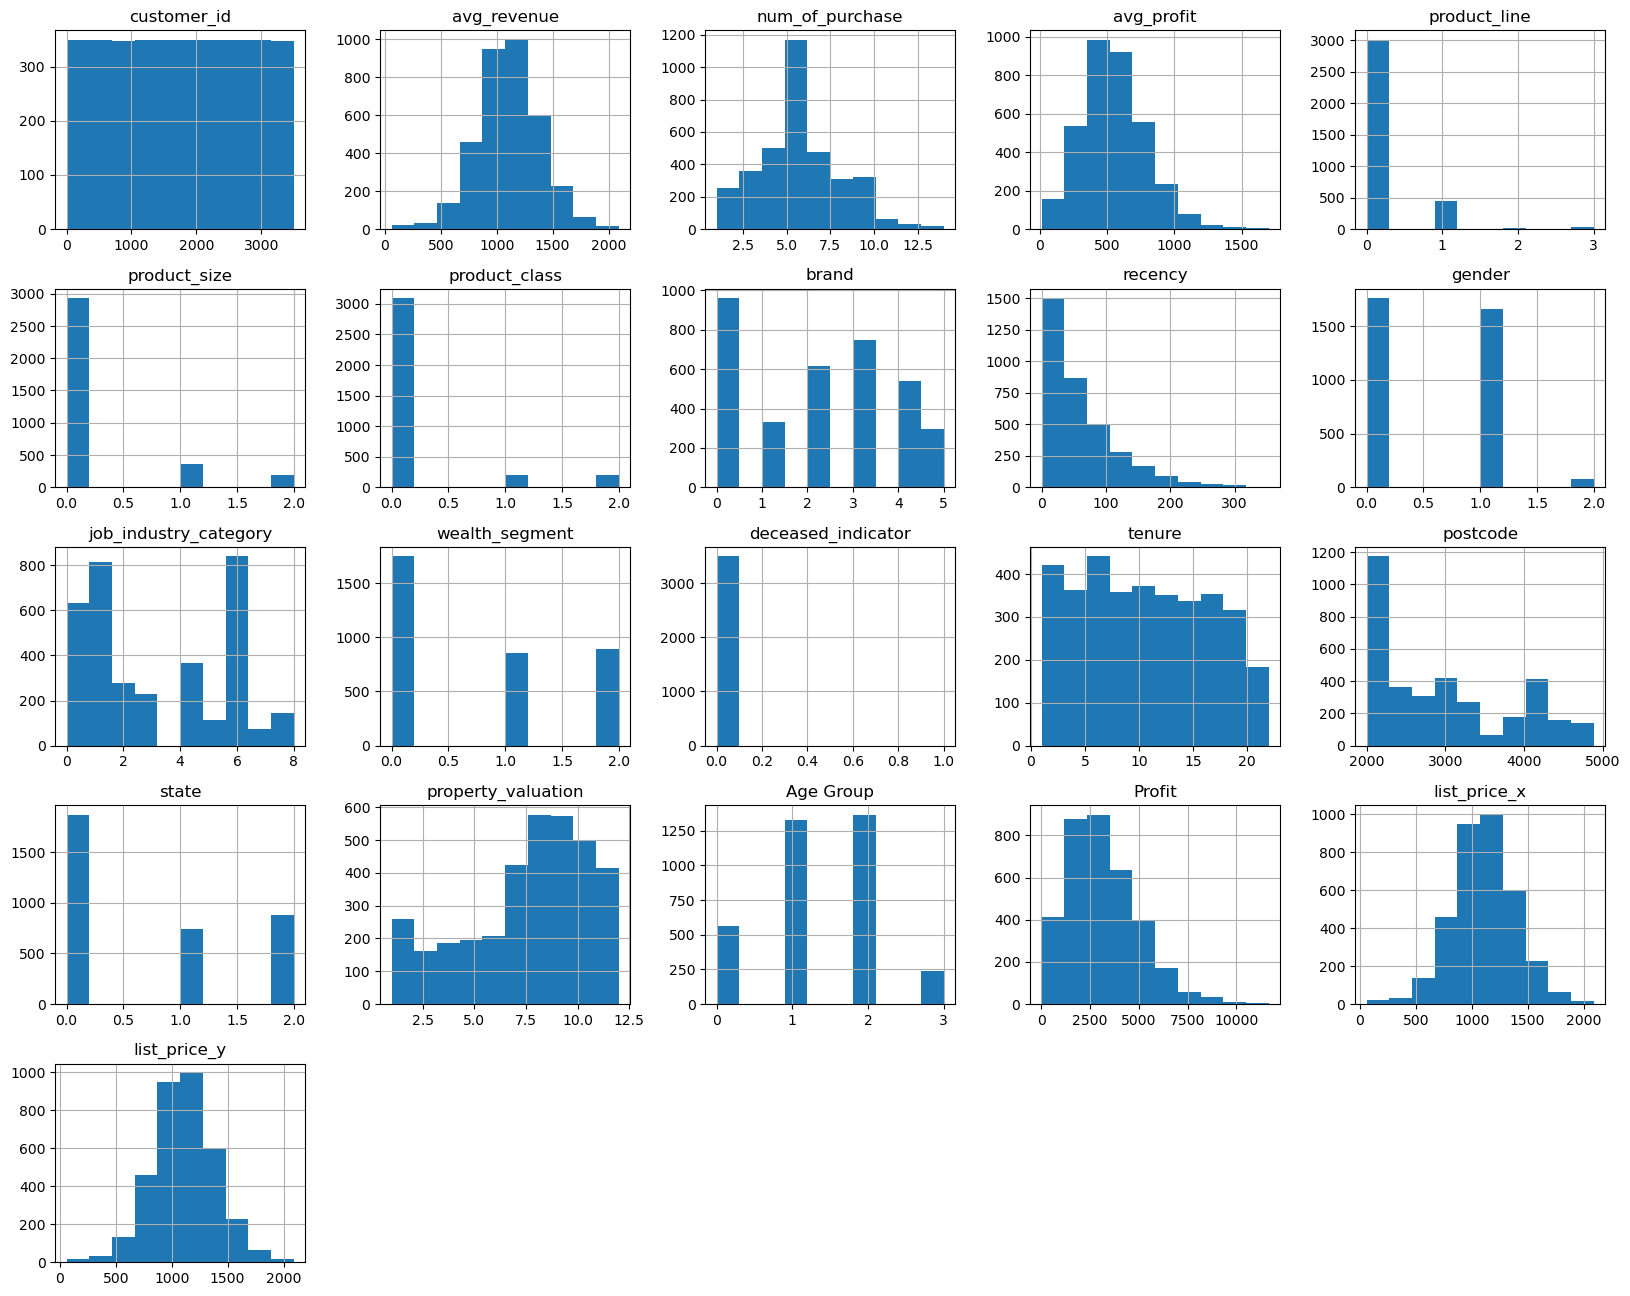

In [581]:
# showing the histogram of Clean dataframe
planet.hist(figsize=(20,16))
plt.show()

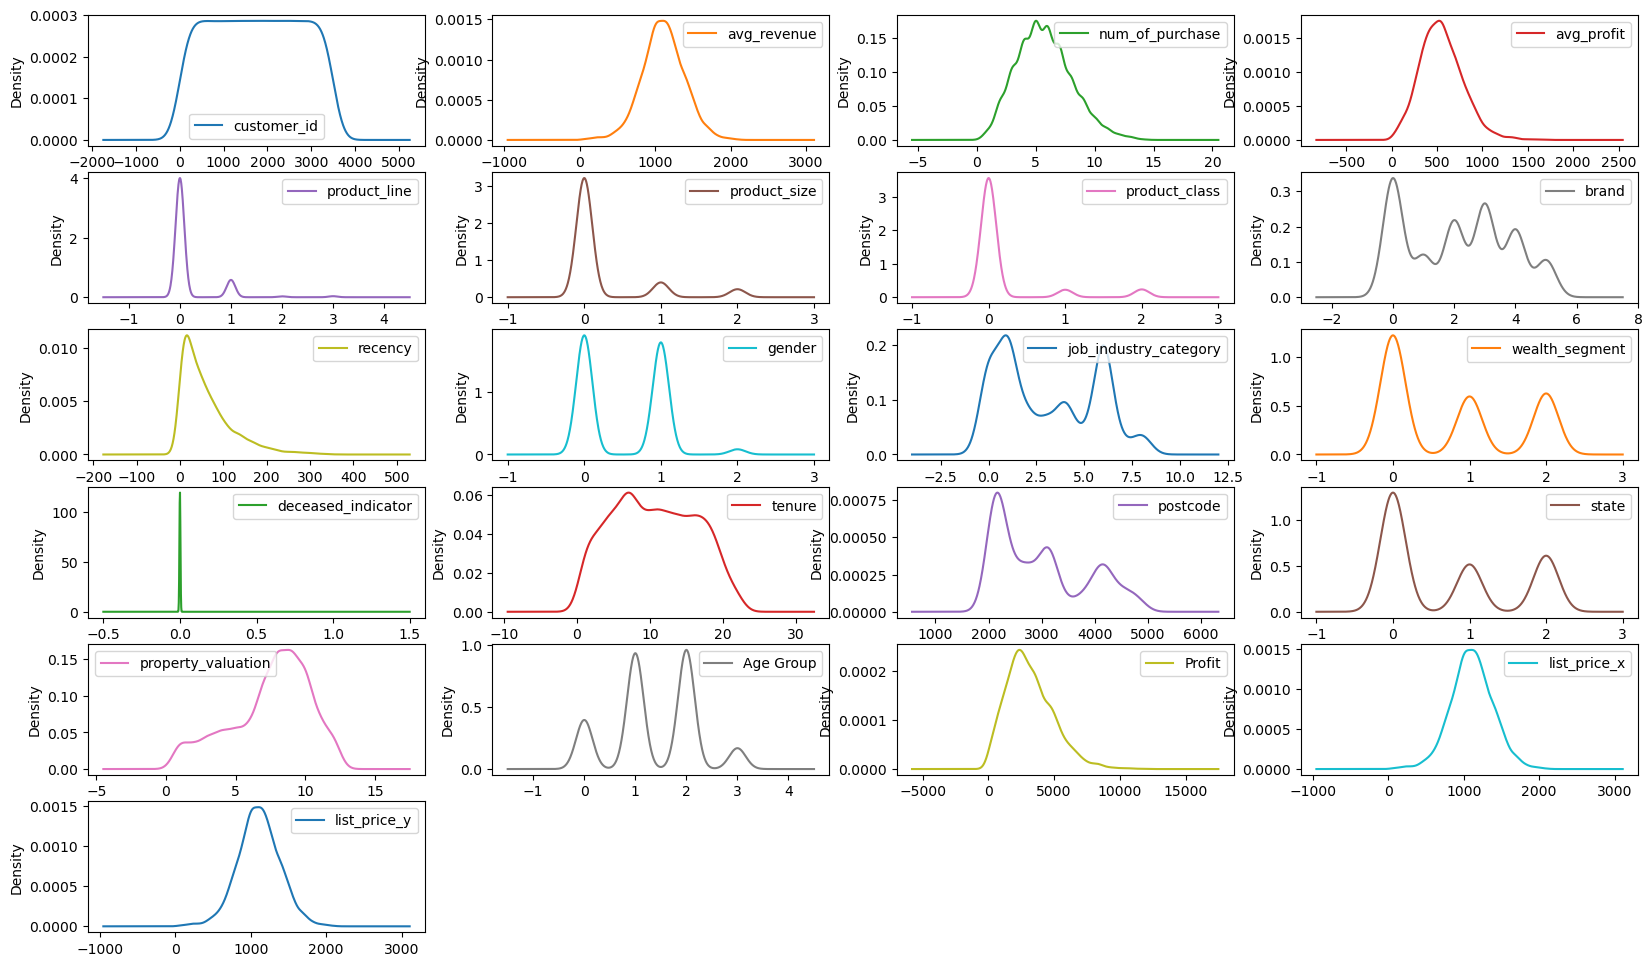

In [582]:
# using plot (density) for your visualization on matplotlib
planet.plot(kind='density', subplots=True, layout=(8,4), sharex=False, figsize=(20,16))
plt.show()

## Preparing the Column names for the Algorithms

In [583]:
planet.columns

Index(['customer_id', 'avg_revenue', 'num_of_purchase', 'avg_profit',
       'product_line', 'product_size', 'product_class', 'brand', 'recency',
       'gender', 'job_industry_category', 'wealth_segment',
       'deceased_indicator', 'tenure', 'postcode', 'state',
       'property_valuation', 'Age Group', 'transaction_date', 'Profit',
       'list_price_x', 'list_price_y'],
      dtype='object')

In [584]:
X = planet[['avg_revenue', 'num_of_purchase', 'avg_profit',
       'product_line', 'product_size', 'product_class', 'brand', 'recency',
       'gender', 'job_industry_category', 'wealth_segment',
       'deceased_indicator', 'tenure', 'postcode', 'state',
       'property_valuation', 'Age Group']]

## Scaling the dataset down to fit the model

In [585]:
# Define the scaler object
scaler = StandardScaler()

# Scaling the DataFrame
scaled_Data_Planet = scaler.fit_transform(X)

In [586]:
k_means = KMeans()
k_means.fit(X)

KMeans()

In [587]:
k_means = KMeans()
k_means.fit_predict(X)

array([0, 6, 3, ..., 2, 5, 0])

## Elbow method to find optimal number of clusters

In [588]:
wcss = []
for i in range (1, 17):
    k_means = KMeans(n_clusters = i)
    k_means.fit(X)
    wcss.append(k_means.inertia_)

In [589]:
wcss

[3014915031.5081973,
 1041547725.5647852,
 651373334.264268,
 582175515.815861,
 467177265.0732488,
 400486041.73843616,
 371326291.71694636,
 342905612.3918673,
 288845955.82890666,
 273635500.0595385,
 254396987.70544112,
 237444823.9016387,
 232342039.4953287,
 213228261.4919423,
 206862622.38418448,
 193618428.631576]

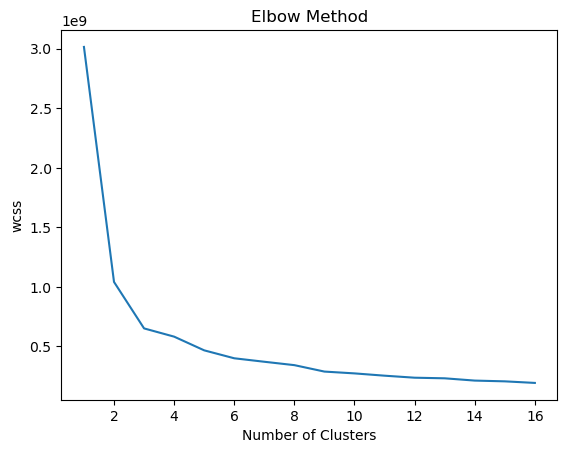

In [590]:
plt.plot(range(1,17), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("wcss")
plt.show()

## Training Model

In [591]:
X = planet[['avg_revenue', 'num_of_purchase', 'avg_profit',
       'product_line', 'product_size', 'product_class', 'brand', 'recency',
       'gender', 'job_industry_category', 'wealth_segment',
       'deceased_indicator', 'tenure', 'postcode', 'state',
       'property_valuation', 'Age Group']]

In [592]:
k_means = KMeans(n_clusters = 5, random_state = 0)
y_means = k_means.fit_predict(X)

In [593]:
y_means

array([3, 2, 2, ..., 0, 1, 3])

## visualized the model

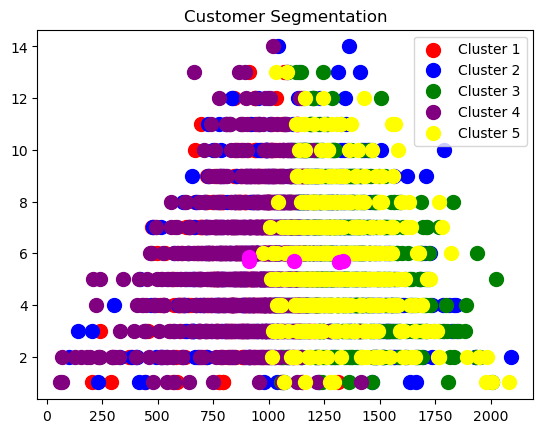

In [594]:
plt.scatter(X.iloc[y_means == 0,0], X.iloc[y_means == 0,1], s = 100, c = 'red', label = "Cluster 1")
plt.scatter(X.iloc[y_means == 1,0], X.iloc[y_means == 1,1], s = 100, c = 'blue', label = "Cluster 2")
plt.scatter(X.iloc[y_means == 2,0], X.iloc[y_means == 2,1], s = 100, c = 'green', label = "Cluster 3")
plt.scatter(X.iloc[y_means == 3,0], X.iloc[y_means == 3,1], s = 100, c = 'purple', label = "Cluster 4")
plt.scatter(X.iloc[y_means == 4,0], X.iloc[y_means == 4,1], s = 100, c = 'yellow', label = "Cluster 5")
plt.scatter(k_means.cluster_centers_[:,0], k_means.cluster_centers_[:,1], s = 100, c = 'magenta')
plt.title("Customer Segmentation")
plt.legend()
plt.show()

## creating a target column "Cluster" for storing the cluster segment

In [595]:
cluster_planet = pd.concat([planet, pd.DataFrame({'Cluster': y_means})], axis=1)
cluster_planet

,customer_id,avg_revenue,num_of_purchase,avg_profit,product_line,product_size,product_class,brand,recency,gender,...,tenure,postcode,state,property_valuation,Age Group,transaction_date,Profit,list_price_x,list_price_y,Cluster
0,1,825.859091,11,274.371818,0.0,0.0,0.0,0.0,7,0.0,...,11,2016,0.0,10,0.0,2017-12-23 00:00:00,3018.09,825.859091,825.859091,3
1,2,1383.023333,3,742.086667,0.0,0.0,0.0,1.0,128,1.0,...,16,2153,0.0,10,1.0,2017-08-24 00:00:00,2226.26,1383.023333,1383.023333,2
2,3,1236.028750,8,420.351250,0.0,1.0,0.0,2.0,102,1.0,...,15,2153,0.0,8,0.0,2017-09-19 00:00:00,3362.81,1236.028750,1236.028750,2
3,4,523.860000,2,110.285000,0.0,1.0,0.0,0.0,195,1.0,...,7,4211,1.0,9,0.0,2017-06-18 00:00:00,220.57,523.860000,523.860000,1
4,5,983.866667,6,399.156667,1.0,1.0,0.0,2.0,16,0.0,...,8,2448,0.0,4,2.0,2017-12-14 00:00:00,2394.94,983.866667,983.866667,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3488,3496,1181.345000,4,511.460000,0.0,0.0,0.0,2.0,256,1.0,...,19,2171,0.0,9,1.0,2017-04-18 00:00:00,2045.84,1181.345000,1181.345000,2
3489,3497,1248.023333,3,549.440000,0.0,0.0,0.0,0.0,52,0.0,...,18,3976,2.0,5,1.0,2017-11-08 00:00:00,1648.32,1248.023333,1248.023333,1
3490,3498,862.843333,6,524.555000,0.0,0.0,0.0,3.0,127,0.0,...,5,3012,2.0,4,1.0,2017-08-25 00:00:00,3147.33,862.843333,862.843333,0
3491,3499,1096.211429,7,707.892857,0.0,0.0,0.0,0.0,51,1.0,...,7,4073,1.0,9,1.0,2017-11-09 00:00:00,4955.25,1096.211429,1096.211429,1


In [621]:
cluster_planet.drop(columns = ["transaction_date"], axis = 1, inplace = True)

In [596]:
# making a prediction 
k_means.predict([[1100,4,511, 0.0, 0.0,0.0,2.0,256,1.0,6.0,0.0,0.0,19,2171,2.0,4,1.0]])

array([3])

In [597]:
# save the model
import joblib

In [598]:
joblib.dump(k_means, "Customer Segmentation")

['Customer Segmentation']

In [599]:
model = joblib.load("Customer Segmentation")

In [618]:
model

DecisionTreeClassifier(criterion='entropy')

## Splitting your dataset into independent and dependent data (Classification)

In [622]:
X = cluster_planet.drop (['Cluster'], axis = 1)
y = cluster_planet[['Cluster']]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3) 

## Using Decision Tree Algorithm to checking the Classification dataset

In [623]:
# Decision Tree
model = DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [624]:
y_pred

array([1, 2, 1, ..., 4, 0, 0])

## Using confusion matrix to check the accuracy

In [625]:
print(metrics.confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[149   1   0   3   2]
 [  1 273   0   0   0]
 [  0   0 193   6   0]
 [  0   0   6 272   0]
 [  4   0   0   0 138]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       155
           1       1.00      1.00      1.00       274
           2       0.97      0.97      0.97       199
           3       0.97      0.98      0.97       278
           4       0.99      0.97      0.98       142

    accuracy                           0.98      1048
   macro avg       0.98      0.98      0.98      1048
weighted avg       0.98      0.98      0.98      1048



## Checking if the clusters were evenly distributed

In [626]:
cluster_counts = cluster_planet.groupby('Cluster').size().reset_index(name='Count')

In [627]:
cluster_counts

,Cluster,Count
0,0,529
1,1,889
2,2,706
3,3,863
4,4,506


## Define mapping dictionaries for each categorical column (Inverse transform of data)

In [628]:
inverse_mapping = {
    'Age Group': {0: 'Old', 1: 'Adult', 2: 'Senior Adult', 3: 'Young Adult'},
    'product_line': {0: 'Standard', 1: 'Road', 2: 'Touring', 3: 'Mountain'},
    'product_size': {0: 'medium', 1: 'large', 2: 'small'},
    'product_class': {0: 'medium', 1: 'high', 2: 'low'},
    'brand': {0: 'Giant Bicycles', 1: 'WeareA2B', 2: 'Norco Bicycles', 3: 'Solex', 4: 'OHM Cycles', 5: 'Trek Bicycles'},
    'gender': {0: 'Female', 1: 'Male', 2: 'Others'},
    'job_industry_category': {0: 'Health', 1: 'Financial Services', 2: 'Property', 3: 'IT', 4: 'Retail', 5: 'Argiculture', 6: 'Manufacturing', 7: 'Telecommuincations', 8: 'Entertainment'},
    'wealth_segment': {0: 'Mass Customer', 1: 'Affluent Customer', 2: 'High Net Worth'},
    'deceased_indicator': {0: 'N', 1: 'Y'},
    'state': {0: 'NSW', 1: 'QLD', 2: 'VIC'}
}

# Perform inverse transformation for each column
for column, mapping in inverse_mapping.items():
    cluster_planet[column].replace(mapping, inplace=True)

In [629]:
cluster_planet.head()

,customer_id,avg_revenue,num_of_purchase,avg_profit,product_line,product_size,product_class,brand,recency,gender,...,deceased_indicator,tenure,postcode,state,property_valuation,Age Group,Profit,list_price_x,list_price_y,Cluster
0,1,825.859091,11,274.371818,Standard,medium,medium,Giant Bicycles,7,Female,...,N,11,2016,NSW,10,Old,3018.09,825.859091,825.859091,3
1,2,1383.023333,3,742.086667,Standard,medium,medium,WeareA2B,128,Male,...,N,16,2153,NSW,10,Adult,2226.26,1383.023333,1383.023333,2
2,3,1236.028750,8,420.351250,Standard,large,medium,Norco Bicycles,102,Male,...,N,15,2153,NSW,8,Old,3362.81,1236.028750,1236.028750,2
3,4,523.860000,2,110.285000,Standard,large,medium,Giant Bicycles,195,Male,...,N,7,4211,QLD,9,Old,220.57,523.860000,523.860000,1
4,5,983.866667,6,399.156667,Road,large,medium,Norco Bicycles,16,Female,...,N,8,2448,NSW,4,Senior Adult,2394.94,983.866667,983.866667,3


In [630]:
# save the clusters table into csv file
cluster_planet.to_csv("Clusters Table.csv")

## Making a table for customers with demographic details but no transactions

In [631]:
#joining customer demo and customer behaviour getting all data from customer behaviour
customerdemographic=pd.merge(customer_demo,Customer_behaviour, on ='customer_id',how='left',indicator=True)

In [632]:
missingcustomer=customerdemographic[customerdemographic['_merge']=='left_only']

In [633]:
missingcustomer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1507 entries, 851 to 4999
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype          
---  ------                               --------------  -----          
 0   customer_id                          1507 non-null   int64          
 1   first_name                           1507 non-null   object         
 2   last_name                            1465 non-null   object         
 3   gender                               1507 non-null   object         
 4   past_3_years_bike_related_purchases  1507 non-null   int64          
 5   DOB                                  1479 non-null   object         
 6   job_title                            1318 non-null   object         
 7   job_industry_category                1247 non-null   object         
 8   wealth_segment                       1507 non-null   object         
 9   deceased_indicator                   1507 non-null   object         
 10  own

In [634]:
#Removing empty transaction columns
missingcustomer.drop(columns=['avg_revenue','num_of_purchase','avg_profit','product_line','product_size','product_class','brand','recency','_merge'],inplace=True)

In [635]:
missingcustomer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1507 entries, 851 to 4999
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          1507 non-null   int64  
 1   first_name                           1507 non-null   object 
 2   last_name                            1465 non-null   object 
 3   gender                               1507 non-null   object 
 4   past_3_years_bike_related_purchases  1507 non-null   int64  
 5   DOB                                  1479 non-null   object 
 6   job_title                            1318 non-null   object 
 7   job_industry_category                1247 non-null   object 
 8   wealth_segment                       1507 non-null   object 
 9   deceased_indicator                   1507 non-null   object 
 10  owns_car                             1507 non-null   object 
 11  tenure                           

In [636]:
missingcustomer['DOB']=pd.to_datetime(missingcustomer['DOB'])

In [637]:
#Making new column Age
missingcustomer['Age']=2024-missingcustomer['DOB'].dt.year

In [638]:
missingcustomer.isnull().sum()

customer_id                              0
first_name                               0
last_name                               42
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     28
job_title                              189
job_industry_category                  260
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  11
postcode                                 0
state                                    0
property_valuation                       0
Age                                     28
dtype: int64

In [639]:
#Dropping unnecessary columns
missingcustomer.drop(columns=['first_name','last_name','DOB','job_title','owns_car',],inplace=True)

In [640]:
missingcustomer.isnull().sum()

customer_id                              0
gender                                   0
past_3_years_bike_related_purchases      0
job_industry_category                  260
wealth_segment                           0
deceased_indicator                       0
tenure                                  11
postcode                                 0
state                                    0
property_valuation                       0
Age                                     28
dtype: int64

In [641]:
#Replacing missin values in job_industry_category
missingcustomer['job_industry_category'].value_counts()

job_industry_category
Manufacturing         295
Financial Services    290
Health                222
Retail                132
Property              100
IT                     85
Entertainment          50
Argiculture            39
Telecommunications     34
Name: count, dtype: int64

In [642]:
missingcustomer['job_industry_category'].fillna(method="ffill",inplace=True)

In [644]:
#Replacing missin values in tenure
missingcustomer['tenure'].fillna(missingcustomer['tenure'].mode()[0],inplace=True)

In [645]:
#making new column agerange
# Define function to categorize age into groups
def categorize_age(age):
    if age <=26:
        return 'Young Adult'
    elif age <=45:
        return 'Adult'
    elif age <=60:
        return 'Senior Adult'
    else:
        return 'Old'
    
# Apply the function to create a new 'Age Group' column
missingcustomer['Age Group'] = missingcustomer['Age'].apply(categorize_age)

In [646]:
missingcustomer.drop(columns='Age',inplace=True)

In [647]:
missingcustomer.isnull().sum()

customer_id                            0
gender                                 0
past_3_years_bike_related_purchases    0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
tenure                                 0
postcode                               0
state                                  0
property_valuation                     0
Age Group                              0
dtype: int64